In [1]:
pip install git+https://github.com/equinor/ecl.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/equinor/ecl.git to c:\users\sirius\appdata\local\temp\pip-req-build-y30wkca1
  Resolved https://github.com/equinor/ecl.git to commit 8f43e8e8aeea9269ba4bb50e290357850298f2af
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for resdata: filename=resdata-4.2.2.dev1+g8f43e8e8-cp311-cp311-win_amd64.whl size=1278955 sha256=b48425184bcd7137dc1c413e379fa88a55b872f5cb73e9d54c9da7940eafe0b0
  Stored in directory: C:\Users\Sirius\AppData\Local\Temp\pip-ephem-wheel-cache-r307vi8e\wheels\62\12\07\d5603bf1d5860cf70569a3758dda494cf04259a811949f8e1b
Succe

  Running command git clone --filter=blob:none --quiet https://github.com/equinor/ecl.git 'C:\Users\Sirius\AppData\Local\Temp\pip-req-build-y30wkca1'


In [2]:
from resdata.summary import Summary
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
summary  = Summary.load('TRUTH_CASE.SMSPEC',  'TRUTH_CASE.UNSMRY')

In [5]:
print ('Wells: ', summary.wells()) #
print ('Groups: ', summary.groups())
print ('Keys: ', summary.keys()) #список ключевых слов 

Wells:  ['I1','I2','I3','P1','P2','P3']
Groups:  []
Keys:  ['FGIP','FGIPG','FGIPL','FGIR','FGIT','FGOR','FGPR','FGPRH','FGPT','FGPTH','FLPR','FLPRH','FLPT','FLPTH','FOIP','FOIPG','FOIPL','FOIR','FOIT','FOPR','FOPRH','FOPT','FOPTH','FPR','FRS','FRV','FVIR','FVIT','FVPR','FVPT','FWCT','FWCTH','FWGR','FWIP','FWIR','FWIRH','FWIT','FWITH','FWPR','FWPRH','FWPT','FWPTH','TIMESTEP','WBHP:I1','WBHP:I2','WBHP:I3','WBHP:P1','WBHP:P2','WBHP:P3','WBHPH:I1','WBHPH:I2','WBHPH:I3','WBHPH:P1','WBHPH:P2','WBHPH:P3','WBP9:I1','WBP9:I2','WBP9:I3','WBP9:P1','WBP9:P2','WBP9:P3','WEPR:I1','WEPR:I2','WEPR:I3','WEPR:P1','WEPR:P2','WEPR:P3','WGIR:I1','WGIR:I2','WGIR:I3','WGIR:P1','WGIR:P2','WGIR:P3','WGIT:I1','WGIT:I2','WGIT:I3','WGIT:P1','WGIT:P2','WGIT:P3','WGOR:I1','WGOR:I2','WGOR:I3','WGOR:P1','WGOR:P2','WGOR:P3','WGPR:I1','WGPR:I2','WGPR:I3','WGPR:P1','WGPR:P2','WGPR:P3','WGPRH:I1','WGPRH:I2','WGPRH:I3','WGPRH:P1','WGPRH:P2','WGPRH:P3','WGPT:I1','WGPT:I2','WGPT:I3','WGPT:P1','WGPT:P2','WGPT:P3','WGPTH:I1',

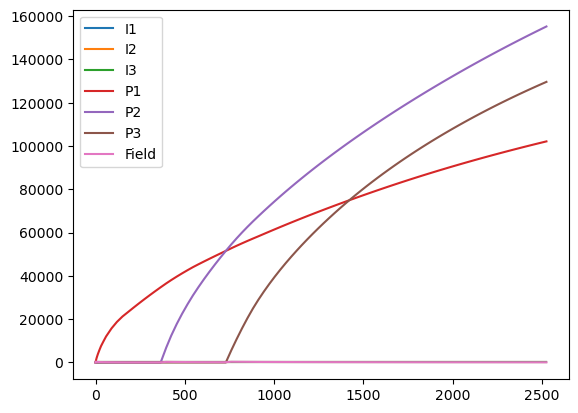

In [8]:
data = {} # словарь данных, где ключи - наименования динамических параметров
					# а значения - расчеты ГДМ 
for key in summary.keys():
    data[key] = summary.get_values(key)

for key in data.keys():
    if key.split(':')[0] == 'WOPT':
        plt.plot(summary.get_days(), data[key],label = key.split(':')[1] )

plt.plot(summary.get_days(), data['FOPR'],label = 'Field' )
plt.legend()

In [7]:
report = pd.DataFrame(data) # таблица с данными по симуляции
report.to_excel('report.xlsx')